In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv("/content/drive/MyDrive/DATA SET/spotify.csv")

In [15]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [16]:
df.shape

(440, 5)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [18]:
#1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful
df.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [19]:
df.duplicated().sum()

27

In [20]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [21]:
df.duplicated().sum()

0

In [23]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

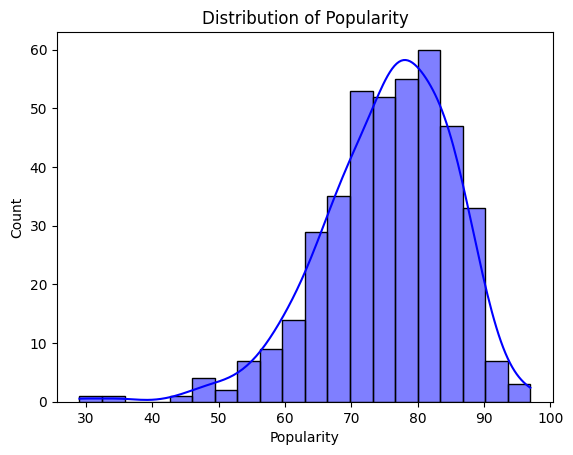

In [26]:
#2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
sns.histplot(df['Popularity'], bins=20, kde=True, color='blue')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Distribution of Popularity')
plt.show()


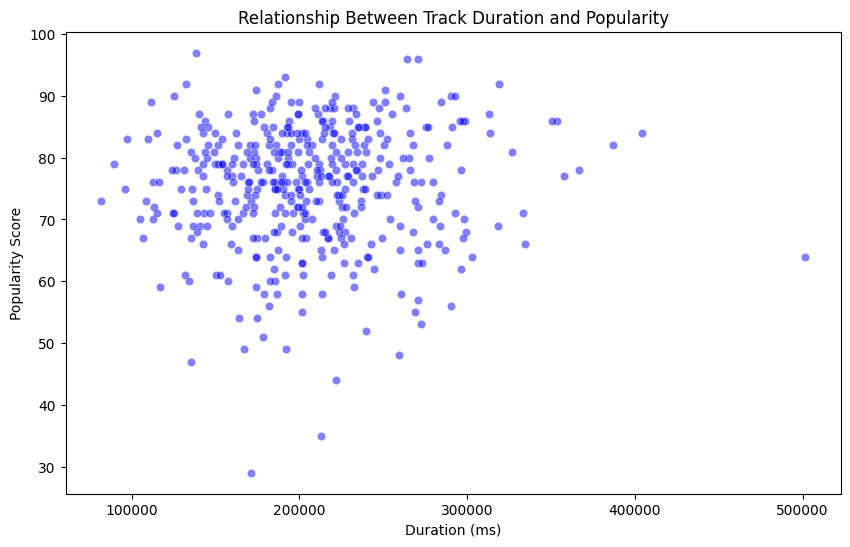

In [27]:
#3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

plt.figure(figsize=(10, 6))

sns.scatterplot(x=df['Duration (ms)'], y=df['Popularity'], alpha=0.5, color='blue')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity Score')
plt.title('Relationship Between Track Duration and Popularity')
plt.show()


In [28]:
correlation = df['Duration (ms)'].corr(df['Popularity'])
print(f'Correlation coefficient: {correlation}')

Correlation coefficient: 0.03899200928439096


In [29]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

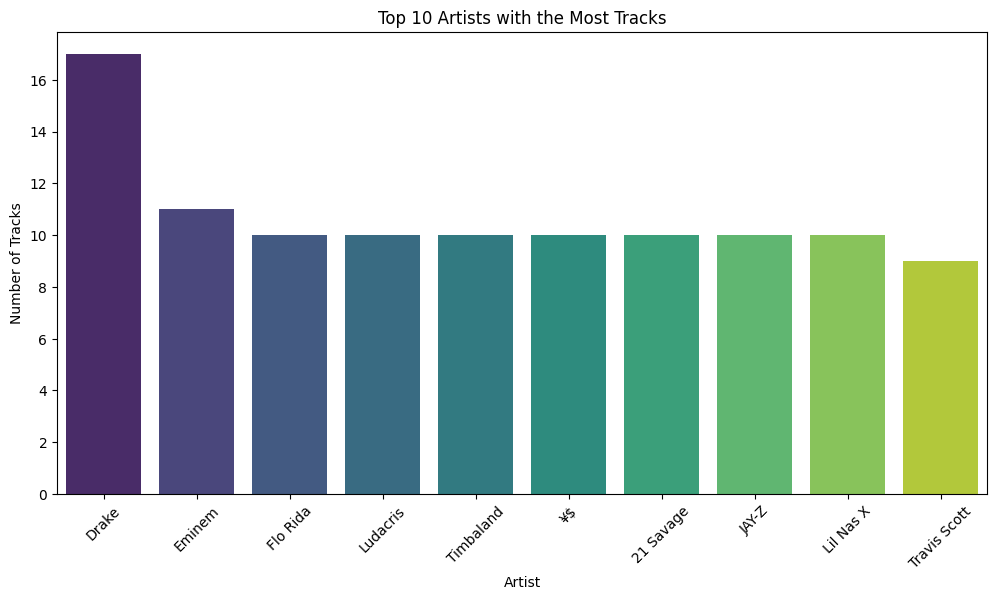

In [40]:
#4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

# Count the number of tracks per artist
artist_counts = df['Artist'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=artist_counts.index[:10], y=artist_counts.values[:10], palette='viridis')

# Labels and title
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.title('Top 10 Artists with the Most Tracks')
plt.xticks(rotation=45)
plt.show()

In [41]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [45]:
#5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for eachleast_popular_tracks = df[['Artist', 'Track Name', 'Popularity']].sort_values(by='Popularity', ascending=True).head(5)

df[['Artist', 'Track Name', 'Popularity']].sort_values(by='Popularity', ascending=True).head(5)


,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


In [44]:
#6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)

,Popularity
Artist,
cassö,92.000000
Trueno,89.000000
David Guetta,87.000000
Travis Scott,86.555556
¥$,85.100000


In [46]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [49]:
#7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

top_popular_artist = df.groupby('Artist')['Popularity'].max().sort_values(ascending=False).head(5)
top_popular_tracks = df[df['Artist'].isin(top_popular_artist.index)][['Artist', 'Track Name', 'Popularity']]
top_popular_tracks.sort_values(by='Popularity', ascending=False).head(5)

,Artist,Track Name,Popularity
40,Jack Harlow,Lovin On Me,97
70,21 Savage,redrum,96
260,¥$,CARNIVAL,96
30,Travis Scott,FE!N (feat. Playboi Carti),93
140,cassö,Prada,92


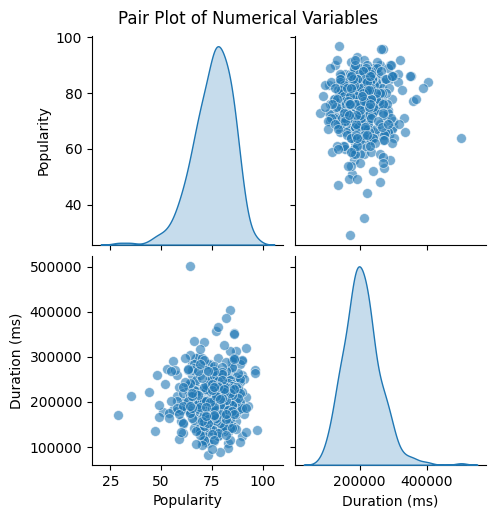

In [50]:
#8. Visualize relationships between multiple numerical variables simultaneously using a pair plot

numerical_cols = ['Popularity', 'Duration (ms)']

sns.pairplot(df[numerical_cols], diag_kind='kde', plot_kws={'alpha':0.6, 's':50})
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

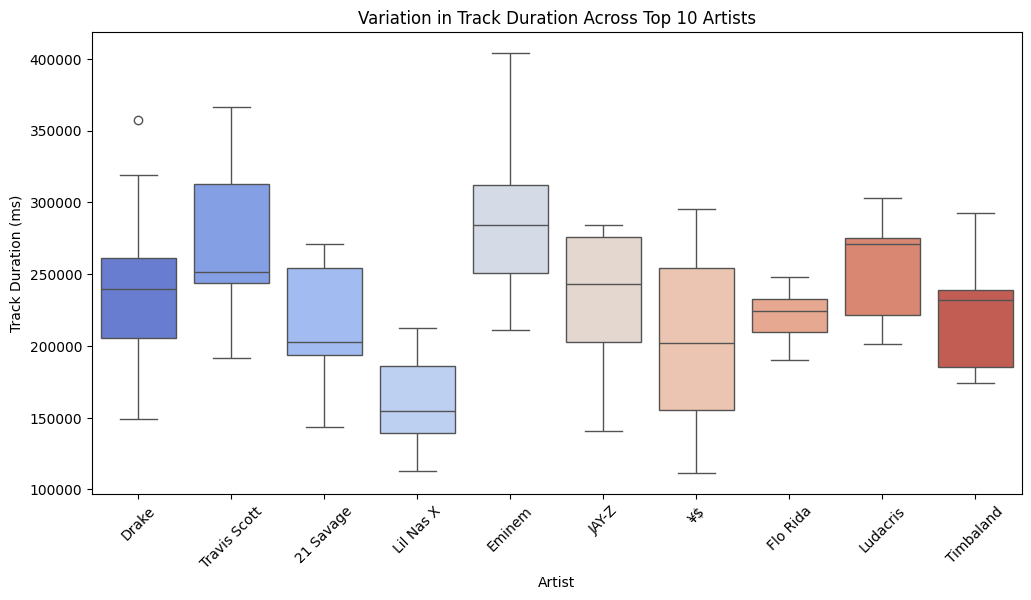

In [52]:
#9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
top_artists = df['Artist'].value_counts().head(10).index
df_top_artists = df[df['Artist'].isin(top_artists)]

plt.figure(figsize=(12, 6))

# Box plot
sns.boxplot(x='Artist', y='Duration (ms)', data=df_top_artists, palette='coolwarm')
plt.xlabel('Artist')
plt.ylabel('Track Duration (ms)')
plt.title('Variation in Track Duration Across Top 10 Artists')
plt.xticks(rotation=45)
plt.show()

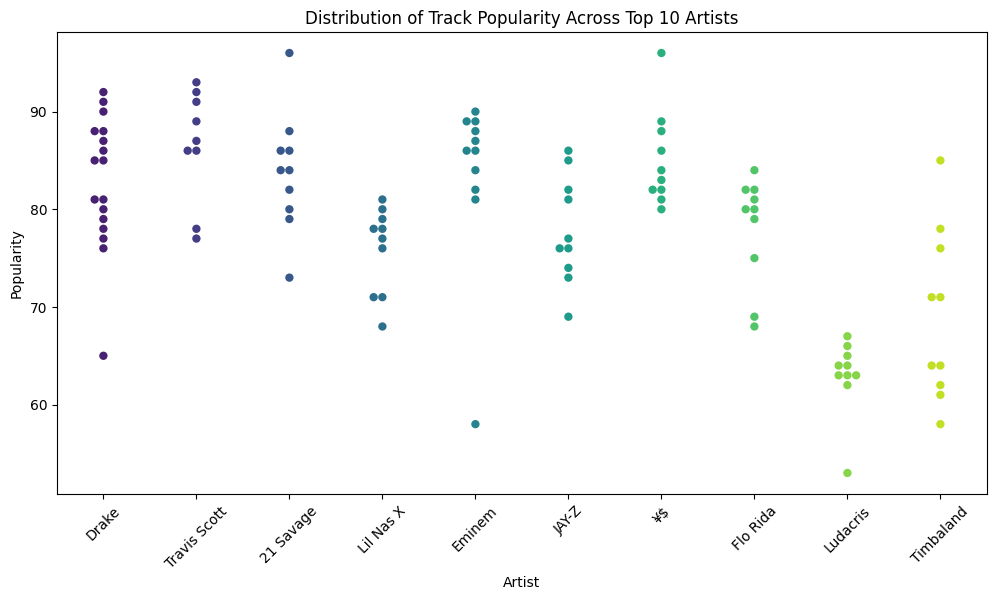

In [55]:
#How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

top_artists = df['Artist'].value_counts().head(10).index
df_top_artists = df[df['Artist'].isin(top_artists)]

plt.figure(figsize=(12, 6))

# Swarm plot
sns.swarmplot(x='Artist', y='Popularity', data=df_top_artists, palette='viridis', size=6)
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.title('Distribution of Track Popularity Across Top 10 Artists')
plt.xticks(rotation=45)
plt.show()